# "Target3 Saldos by ECB"
> "Capital flows between European Central Banks since 2001"

- toc:true
- branch: master
- badges: true
- comments: true
- author: <a href=https://github.com/claudia-chehade/>Claudia Chehade</a>
- image: images/target2_small.png
- categories: [ECB, Capital Flow, Target2]

In [27]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import ecb_utils

In [10]:
#hide
df_mf1_europe_with_index = pd.read_csv("data\m1_ecb_RTD.M.S0.N.M_M1_V_NC.E.csv")
df_mf1_europe_with_index

Data Source in SDW: https://sdw.ecb.europa.eu/browseSelection.do?type=series&q=m1&node=SEARCHRESULTS&ec=&oc=&rc=&cv=&pb=&dc=&df=
NaN          BSI.M.U2.Y.V.M10.X.1.U2.2300.Z01.E                                             RTD.M.S0.N.M_M1_V_NC.E                                                                              
             Euro area (changing composition), Outstanding a...  Euro area (moving concept in the Real Time dat...                                                                              
Collection:  End of period (E)                                                                   End of period (E)                                                                              
Period\Unit: [Millions of Euro]                                                                 [Millions of Euro]                                                                              
2020Jul      9784071                                                                                           NaN                                                                              
...                                                                                                            ...                                                                              
1980May      455917                                                                                         455917                                                                              
1980Apr      453226                                                                                         453226                                                                              
1980Mar      451370                                                                                         451370                                                                              
1980Feb      447116                                                                                         447116                                                                              
1980Jan      444330                                                                                         444330                                                                              

[491 rows x 1 columns]

In [11]:
df_mf1_europe = pd.read_csv("data\m1_ecb_RTD.M.S0.N.M_M1_V_NC.E.csv", skiprows=1)
df_mf1_europe

,Unnamed: 0,BSI.M.U2.Y.V.M10.X.1.U2.2300.Z01.E,RTD.M.S0.N.M_M1_V_NC.E
0,NaN,"Euro area (changing composition), Outstanding ...",Euro area (moving concept in the Real Time dat...
1,Collection:,End of period (E),End of period (E)
2,Period\Unit:,[Millions of Euro],[Millions of Euro]
3,2020Jul,9784071,NaN
4,2020Jun,9705477,NaN
...,...,...,...
485,1980May,455917,455917
486,1980Apr,453226,453226
487,1980Mar,451370,451370
488,1980Feb,447116,447116


In [12]:
#hide
df_mf2_europe = pd.read_csv("data\m2_ecb_RTD.M.S0.N.M_M2_V_NC.E.csv", skiprows=1)
df_mf2_europe

,Unnamed: 0,RTD.M.S0.N.M_M2_V_NC.E
0,NaN,Euro area (moving concept in the Real Time dat...
1,Collection:,End of period (E)
2,Period\Unit:,[Millions of Euro]
3,2020Apr,12955954
4,2020Mar,12776433
...,...,...
482,1980May,1100958
483,1980Apr,1093263
484,1980Mar,1088333
485,1980Feb,1078232


In [13]:
#hide
df_mf3_europe = pd.read_csv("data\m3_ecb_RTD.M.S0.N.M_M3_V_NC.E.csv", skiprows=1)
df_mf3_europe

,Unnamed: 0,RTD.M.S0.N.M_M3_V_NC.E
0,NaN,Euro area (moving concept in the Real Time dat...
1,Collection:,End of period (E)
2,Period\Unit:,[Millions of Euro]
3,2020Apr,13638559
4,2020Mar,13478284
...,...,...
482,1980May,1130672
483,1980Apr,1122639
484,1980Mar,1117228
485,1980Feb,1105520


In [14]:
#hide
df_mf1_europe

,Unnamed: 0,BSI.M.U2.Y.V.M10.X.1.U2.2300.Z01.E,RTD.M.S0.N.M_M1_V_NC.E
0,NaN,"Euro area (changing composition), Outstanding ...",Euro area (moving concept in the Real Time dat...
1,Collection:,End of period (E),End of period (E)
2,Period\Unit:,[Millions of Euro],[Millions of Euro]
3,2020Jul,9784071,NaN
4,2020Jun,9705477,NaN
...,...,...,...
485,1980May,455917,455917
486,1980Apr,453226,453226
487,1980Mar,451370,451370
488,1980Feb,447116,447116


In [15]:
#hide  
def reduce_data(df_data_original, columns_to_be_dropped=None, columns_to_be_renamed=None):
    
    df_data = df_data_original.copy()
    
    # drop lines with units and category    
    df_data.drop(index=0, axis=0, inplace=True)
    df_data.drop(index=1, axis=0, inplace=True)
    df_data.drop(index=2, axis=0, inplace=True)
    
    # make the month column to index, convert the format and sort it ascending
    df_data = ecb_utils.make_time_series(df_data)

    # drop real time column since the newest values are missing here
    if columns_to_be_dropped:
        df_data.drop(columns_to_be_dropped, axis=1, inplace=True)
    
    # rename columns
    if columns_to_be_renamed:
        df_data.rename(columns=columns_to_be_renamed, inplace=True)

    # convert objects to floats
    df_data = df_data.astype(float)
    return df_data

df_reduced1 = reduce_data(df_mf1_europe, ['RTD.M.S0.N.M_M1_V_NC.E'], {'BSI.M.U2.Y.V.M10.X.1.U2.2300.Z01.E':'M1'})
df_reduced1

,M1
Year / Months,
1980-01,444330.0
1980-02,447116.0
1980-03,451370.0
1980-04,453226.0
1980-05,455917.0
...,...
2020-03,9337082.0
2020-04,9506460.0
2020-05,9631254.0


In [16]:
#hide
df_reduced2 = reduce_data(df_mf2_europe, None, {'RTD.M.S0.N.M_M2_V_NC.E':'M2'})
df_reduced2

,M2
Year / Months,
1980-01,1070496.0
1980-02,1078232.0
1980-03,1088333.0
1980-04,1093263.0
1980-05,1100958.0
...,...
2019-12,12377138.0
2020-01,12397079.0
2020-02,12487571.0


In [17]:
#hide
df_reduced3 = reduce_data(df_mf3_europe, None, {'RTD.M.S0.N.M_M3_V_NC.E':'M3'})
df_reduced3

,M3
Year / Months,
1980-01,1097404.0
1980-02,1105520.0
1980-03,1117228.0
1980-04,1122639.0
1980-05,1130672.0
...,...
2019-12,12995152.0
2020-01,13045243.0
2020-02,13149702.0


In [18]:
#hide
df_europe = df_reduced1.merge(df_reduced2, left_index=True, right_index=True)
df_europe = df_europe.merge(df_reduced3, left_index=True, right_index=True)
df_europe

,M1,M2,M3
Year / Months,,,
1980-01,444330.0,1070496.0,1097404.0
1980-02,447116.0,1078232.0,1105520.0
1980-03,451370.0,1088333.0,1117228.0
1980-04,453226.0,1093263.0,1122639.0
1980-05,455917.0,1100958.0,1130672.0
...,...,...,...
2019-12,8944195.0,12377138.0,12995152.0
2020-01,8971893.0,12397079.0,13045243.0
2020-02,9062821.0,12487571.0,13149702.0


<Figure size 432x288 with 0 Axes>

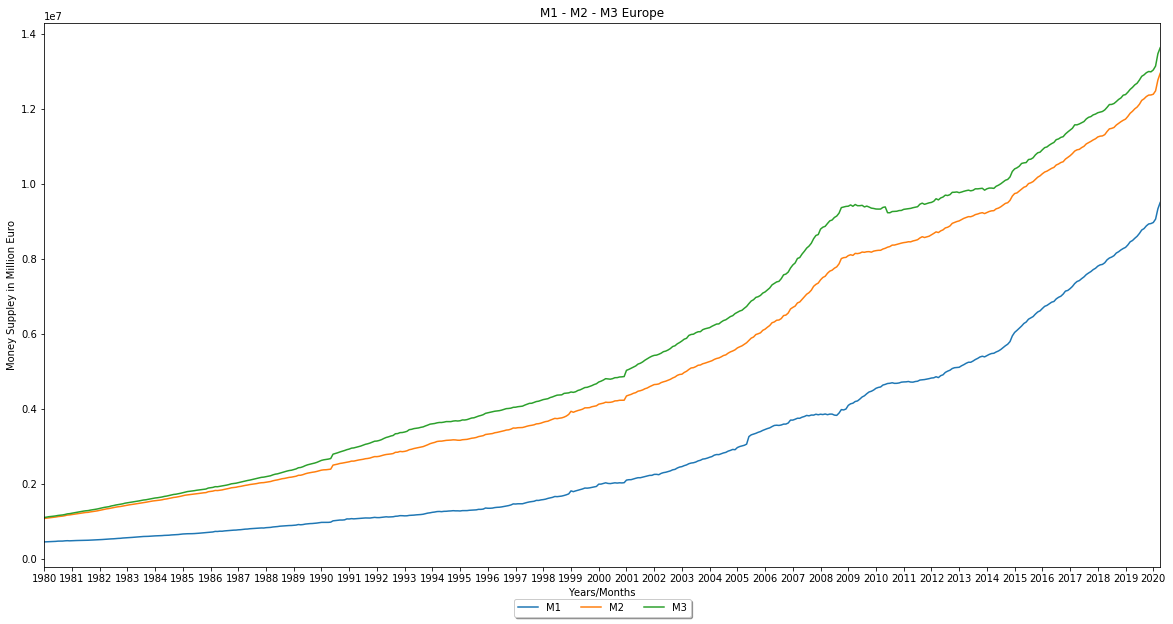

In [19]:
#hide
years = np.arange(1980, 2021, 1);
plt.figure();
ax = df_europe.plot(kind='line', figsize=(20,10), title='M1 - M2 - M3 Europe');
plt.xlabel('Year / Months);
plt.ylabel('Money Suppley in Million Euro');
plt.xticks(np.arange(0, df_europe.shape[0], step=12), years);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

In [ ]:
#df_mf1_europe.iloc[0:5, :1] # nur die ersten 5 Zeilen

In [ ]:
#df_mf1_europe.iloc[:,1:2] # nur die erste Spalte

In [ ]:
#indicator = df_mf1_europe.iloc[1:2,1:2] # nur die erste Spalte, zweite Zeile
#indicator

In [28]:
#hide-input
def altair_plot(source, x_value, y_value, var_name):
    source = source.reset_index().melt(x_value, var_name=var_name, value_name=y_value)

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=[x_value], empty='none')

    # The basic line
    line = alt.Chart(source).mark_line(interpolate='basis').encode(
        x=f'{x_value}:T',
        y=f'{y_value}:Q',
        color=f'{var_name}:N'
    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
        x=f'{x_value}:T',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 
                        f'{y_value}:Q',
                        alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
        x=f'{x_value}:T',
    ).transform_filter(
        nearest
    )

    return alt.layer(
        line, selectors, points, rules, text
    ).properties(
        width=600, height=500
    )
    
altair_plot(df_europe, 'Year / Months', 'Money Suppley in Million Euro', 'Money Suppley')

alt.LayerChart(...)